In [10]:
from deepsudoku import REPO_PATH
import os
os.chdir(REPO_PATH)
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import tqdm
from deepsudoku import DIFFICULTIES
import seaborn as sns

In [17]:
def preprocess_df(df):
    


    df = df[["epoch", "val_accuracy","accuracy","sudoku_win_rate","val_sudoku_win_rate",]]
    
    df = df.rename(columns = {
        "epoch":"Epoch",
        "val_accuracy" : "Val Accuracy", 
        "accuracy" : "Train Accuracy", 
        "sudoku_win_rate" : "Train Winrate",
        "val_sudoku_win_rate" : "Val Winrate",
    })
    
    df.columns = [i.title() for i in df.columns]
    df_melt = df.melt('Epoch', var_name='Metric', value_name='Values')
    df_melt["Values"] *= 100
    
    return df_melt

In [19]:
conv_head = preprocess_df(pd.read_csv("logs/easy_conv_head/logs.csv"))
conv_head["Model"] = "Only Conv"

fc_head = preprocess_df(pd.read_csv("logs/easy_fc_head/logs.csv"))
fc_head["Model"] = "Conv with FC Head"

only_mlp = preprocess_df(pd.read_csv("logs/easy_mlp/logs.csv"))
only_mlp["Model"] = "MLP"

combined = pd.concat((conv_head, fc_head, only_mlp))

/home/felix/anaconda3/envs/sudoku/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_5851/4218463057.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


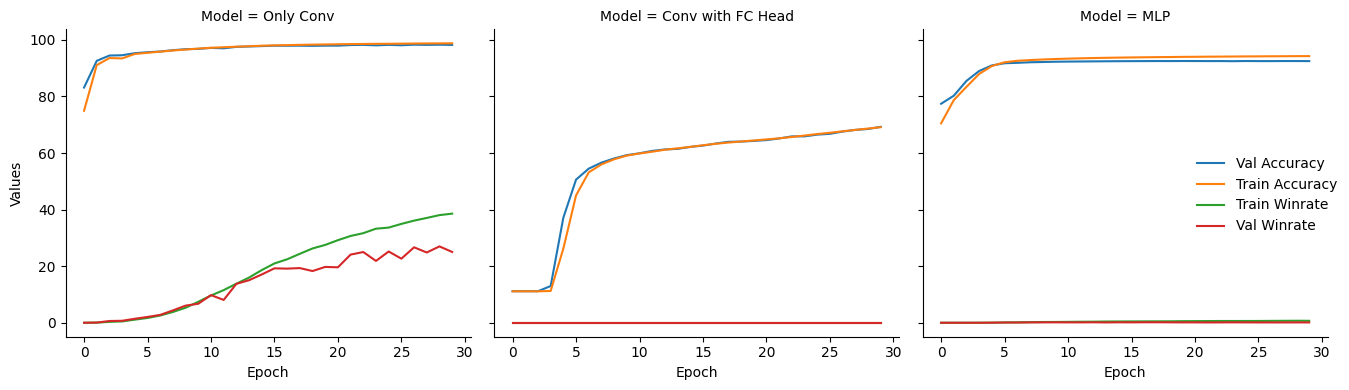

In [20]:
grid = sns.FacetGrid(combined, col = "Model", height = 4)
grid.map_dataframe(sns.lineplot, x="Epoch", y="Values", hue="Metric")
grid.add_legend()

plt.tight_layout()

/home/felix/anaconda3/envs/sudoku/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_5851/4014747501.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


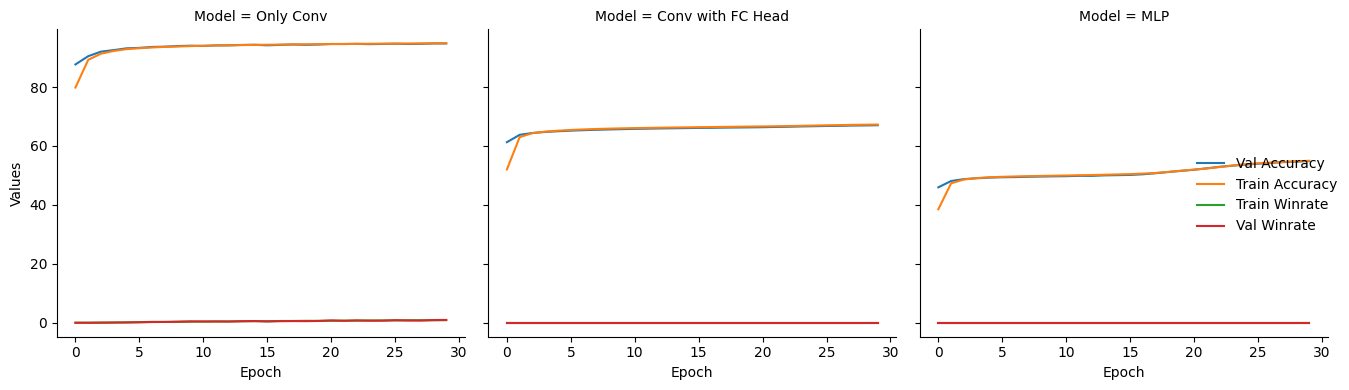

In [21]:
same_conv_conv_head = preprocess_df(pd.read_csv("logs/same_conv_conv_head/logs.csv"))
same_conv_conv_head["Model"] = "Only Conv"

same_conv = preprocess_df(pd.read_csv("logs/same_conv/logs.csv"))
same_conv["Model"] = "Conv with FC Head"


same_mlp = preprocess_df(pd.read_csv("logs/same_mlp/logs.csv"))
same_mlp["Model"] = "MLP"

together = pd.concat([same_conv_conv_head, same_conv, same_mlp])

grid = sns.FacetGrid(together, col = "Model", height = 4)
grid.map_dataframe(sns.lineplot, x="Epoch", y="Values", hue="Metric")
grid.add_legend()

plt.tight_layout()